<a href="https://colab.research.google.com/github/SaranyaRavikumar06/ACE-Assessment/blob/main/Ace_Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Step 1: Import the dataset**

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/SaranyaRavikumar06/ACE-Assessment/main/palm_ffb.csv")

**Step 2: Data Exploration**

In [ ]:
df.shape

(130, 9)

In [ ]:
df.head(10)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
5,01.06.2008,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
6,01.07.2008,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
7,01.08.2008,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
8,01.09.2008,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62
9,01.10.2008,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
#Change the datatype of the "Date" column as "datetime" datatype
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [ ]:
#Check for missing values
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [ ]:
#Create a new column by extracting the year from the date attribute
df['year'] = pd.DatetimeIndex(df['Date']).year


In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,year,month
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,2008,1
1,2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008,2
2,2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,2008,3
3,2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,2008,4
4,2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,2008,5


**Step 3:Visulaization**

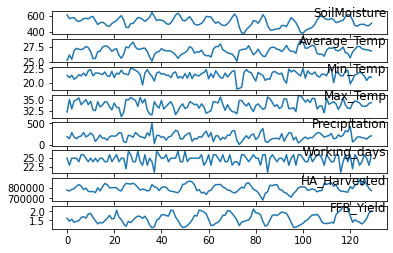

In [ ]:
#Plot the quantitative values as group chart using line graph
import matplotlib.pyplot as plt
values = df.values
groups = [1, 2, 3, 4, 5, 6, 7,8]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

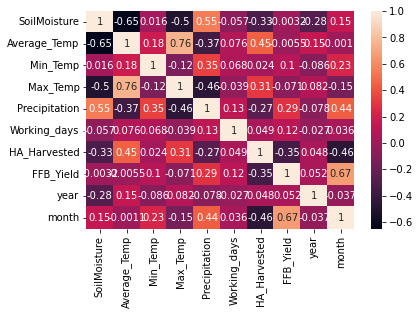

In [ ]:
#Visulaize the correlation among the data by using the heat map
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7102da3d0>,
      dtype=object)

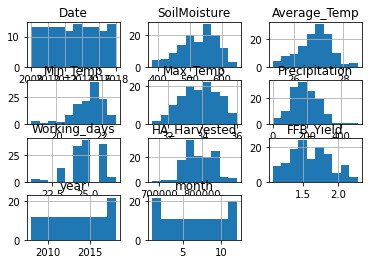

In [ ]:
df.hist()

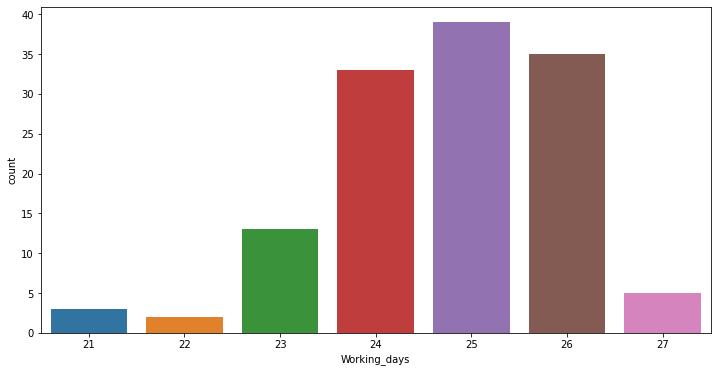

In [ ]:
#Find how many number of working days contribute more FFB Yield data
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = df)
#Here we explore that the FFB yield data consist of more no of data for working days is 25


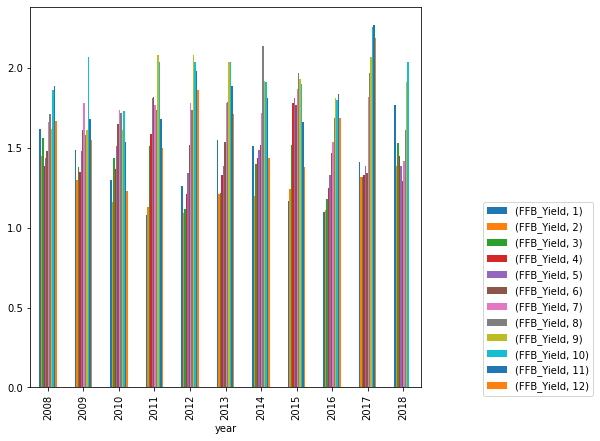

In [ ]:
#Visulaise which year produces high average FFB Yield

table = pd.pivot_table(df,index='year',columns='month',aggfunc={'FFB_Yield':np.mean})
plotting=table.plot(kind="bar")
fig = plotting.get_figure()
fig.set_size_inches(7, 7)
fig.legends
lgd = plotting.legend(loc=9, bbox_to_anchor=(1.3,0.5))

We found during the year 2017 the average FFB Yield was more when compared with other years

## **Step 4: Feature Selection**

In [ ]:
correlation = abs(df.corr()["FFB_Yield"])
correlation

SoilMoisture     0.003183
Average_Temp     0.005494
Min_Temp         0.103830
Max_Temp         0.071201
Precipitation    0.289604
Working_days     0.116364
HA_Harvested     0.350222
FFB_Yield        1.000000
year             0.051947
month            0.671277
Name: FFB_Yield, dtype: float64

Create two dataset 
('a')with the input features without having the target column(FFB Yield) and 
also less important features(Date,month,year) for our machine learning model.
('b')with target column (FFB_Yield)

In [ ]:
a= df.drop(['FFB_Yield','Date','month','year'],axis=1) 
b = df.FFB_Yield   

In [ ]:
a

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222
...,...,...,...,...,...,...,...
125,498.2,27.213333,21.6,33.6,165.6,24,820758.9147
126,494.7,27.074194,21.2,33.5,154.7,26,882254.2254
127,478.8,27.016129,20.4,33.6,127.2,25,829488.8199
128,481.1,26.946667,21.0,34.2,180.6,23,792101.0471


Find feature IMportance by boosting ensembling method

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
# fit the model
model.fit(a, b)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


[01:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.09442
Feature: 1, Score: 0.13203
Feature: 2, Score: 0.10492
Feature: 3, Score: 0.09676
Feature: 4, Score: 0.23888
Feature: 5, Score: 0.06003
Feature: 6, Score: 0.27297


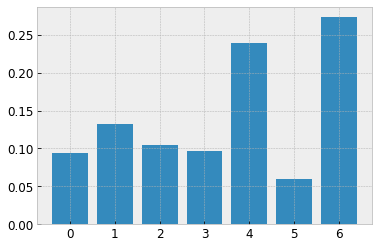

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We found that the Precipitation	and	HA_Harvested are high important features in analysing the FFB Yield

# **Step 5: Build Machine Learning Model: Multiple Linear Regression**

In [ ]:
newdf=df.drop(['Date','month','year'],axis=1) 


In [ ]:
newdf['Working_days']=newdf['Working_days'].astype('float')

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    float64
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
dtypes: float64(8)
memory usage: 8.2 KB


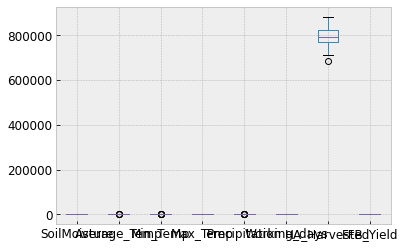

In [ ]:
newdf.boxplot()

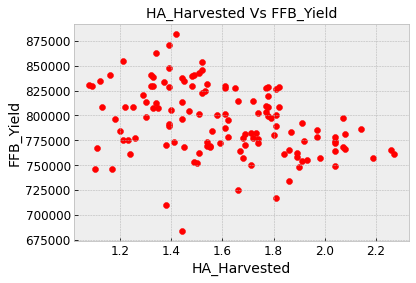

In [ ]:
#Visulaize the spread of FFB Yield vs Harvested 
plt.scatter( newdf['FFB_Yield'],newdf['HA_Harvested'], color='red')
plt.title('HA_Harvested Vs FFB_Yield', fontsize=14)
plt.ylabel('FFB_Yield', fontsize=14)
plt.xlabel('HA_Harvested', fontsize=14)
plt.grid(True)
plt.show()

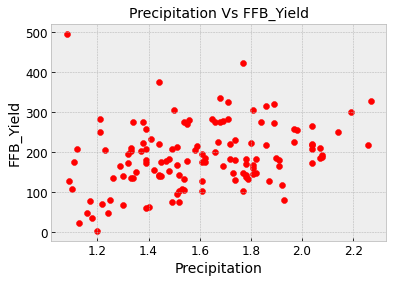

In [ ]:
plt.scatter( newdf['FFB_Yield'],newdf['Precipitation'], color='red')
plt.title('Precipitation Vs FFB_Yield', fontsize=14)
plt.ylabel('FFB_Yield', fontsize=14)
plt.xlabel('Precipitation', fontsize=14)
plt.grid(True)
plt.show()

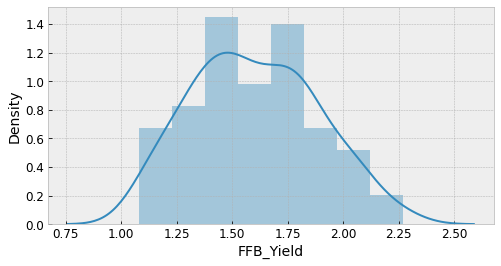

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['FFB_Yield'])

**Feature Scaling**

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_df = StandardScaler()
df_std = sc_df.fit_transform(newdf)

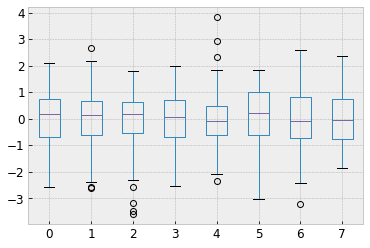

In [ ]:
newdf_std1=pd.DataFrame(df_std)
newdf_std1.boxplot()

In [ ]:
newdf_std1.shape

(130, 8)

**Handle Outliers**

In [ ]:
import scipy.stats as stats
zscores = stats.zscore(newdf_std1)
zscores

In [ ]:
import numpy as np
abs_z_scores = np.abs(zscores)
abs_z_scores

In [ ]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df2 = newdf_std1[filtered_entries]

In [ ]:
new_df2.shape

(122, 8)

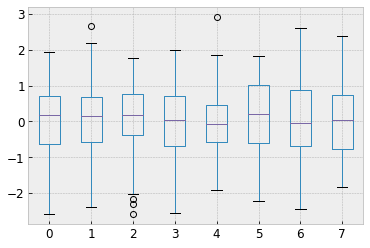

In [ ]:
new_df2.boxplot()

In [ ]:
a= new_df2.drop([7],axis=1)


In [ ]:
b=new_df2[7]

In [ ]:
a= newdf_std1.drop([7],axis=1)
b=newdf_std1[7]

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 100)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([-0.10338514,  0.57831156,  0.35270166, -0.30397543,  0.08152761,
        0.10110614, -0.49318977, -0.63500355, -0.8370689 , -0.39898473,
       -1.361935  , -0.40082693, -0.09875667,  0.21600415,  0.32022364,
        0.97103102, -0.30801675, -0.18391084,  0.12713953,  0.40111215,
        0.42988652,  0.32937413, -0.80287446, -0.07866697, -0.13572101,
        0.37129007])

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is 0.35389553161651155
mean_sqrd_error is== 0.802464878288747
root_mean_squared error of is== 0.8958040401163343


# **Using Deep Learning Neural Network **

In [ ]:
X = df.drop(['Date','month','year'],axis=1) 
y = df['FFB_Yield']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Creating a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(3,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
#Training the Model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 1.0945 - val_loss: 1.1022
Epoch 2/400
1/1 [==============================] - 0s 33ms/step - loss: 1.0551 - val_loss: 1.0623
Epoch 3/400
1/1 [==============================] - 0s 33ms/step - loss: 1.0163 - val_loss: 1.0230
Epoch 4/400
1/1 [==============================] - 0s 29ms/step - loss: 0.9782 - val_loss: 0.9843
Epoch 5/400
1/1 [==============================] - 0s 47ms/step - loss: 0.9408 - val_loss: 0.9464
Epoch 6/400
1/1 [==============================] - 0s 48ms/step - loss: 0.9039 - val_loss: 0.9088
Epoch 7/400
1/1 [==============================] - 0s 43ms/step - loss: 0.8676 - val_loss: 0.8720
Epoch 8/400
1/1 [==============================] - 0s 30ms/step - loss: 0.8320 - val_loss: 0.8359
Epoch 9/400
1/1 [==============================] - 0s 30ms/step - loss: 0.7971 - val_loss: 0.8007
Epoch 10/400
1/1 [==============================] - 0s 32ms/step - loss: 0.7628 - val_loss: 0.7662
Epoch 11/400
1/1 [===

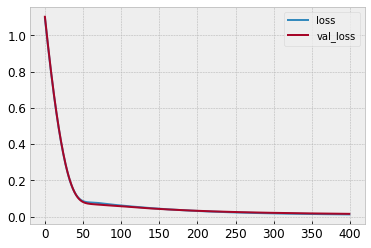

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
#Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model.predict(X_test)
predictions

array([[1.6406418 ],
       [1.8862704 ],
       [1.414092  ],
       [1.899971  ],
       [1.8532008 ],
       [1.8563603 ],
       [1.9401783 ],
       [1.8862597 ],
       [1.8717378 ],
       [1.6214403 ],
       [1.4843733 ],
       [1.6060034 ],
       [1.4263173 ],
       [1.5259633 ],
       [0.97307414],
       [1.3855283 ],
       [1.1671228 ],
       [1.7756294 ],
       [1.8365095 ],
       [1.1933368 ],
       [1.6065677 ],
       [2.1020172 ],
       [1.7931089 ],
       [1.6236771 ],
       [1.493519  ],
       [2.0252717 ],
       [1.7894933 ],
       [1.5655117 ],
       [1.6287348 ],
       [1.5864803 ],
       [1.3959068 ],
       [1.6538447 ],
       [1.1683373 ],
       [1.1534503 ],
       [1.5085937 ],
       [1.3422594 ],
       [1.5866942 ],
       [1.322396  ],
       [1.4786538 ]], dtype=float32)

In [ ]:
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))

MAE:  0.10604931776340192
MSE:  0.015820854464723023


In [ ]:
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))

RMSE:  0.12578097815140024


In [ ]:
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))


Variance Regression Score:  0.7947275496727729


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

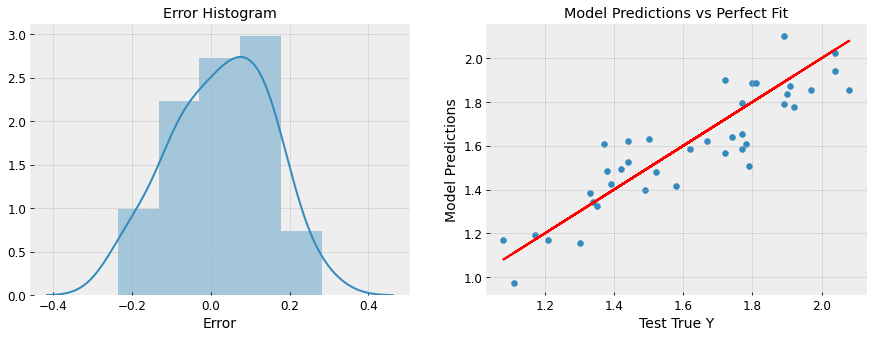

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(39, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [ ]:
# Predicting on a brand new house
# fueatures of new house
FFB_prev = df.drop(['Date','year','month'],axis=1).iloc[0]
print(f'Features of new FFB:\n{FFB_prev}')



Features of new FFB:
SoilMoisture        616.400000
Average_Temp         25.306452
Min_Temp             21.300000
Max_Temp             32.200000
Precipitation       184.400000
Working_days         25.000000
HA_Harvested     777778.395100
FFB_Yield             1.620000
Name: 0, dtype: float64


In [ ]:
# reshape the numpy array and scale the features
FFB_prev = scaler.transform(FFB_prev.values.reshape(-1,8))



In [ ]:
# run the model and get the price prediction
print('\nPrediction Price:',model.predict(FFB_prev)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['FFB_Yield'])


Prediction Price: 1.5864803

Original Price: 1.62


**From the previous discussion , we applied both Multiple lInear Regression and Deep learning model and found that the Deep Learning model produces high accuracy**